# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day.

You are required to work on predecting the forecast for the watching hours.

In [3]:
dataframe = pd.read_excel("/content/stc TV Data Set_T2 .xlsx",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [4]:
# check the data shape
dataframe.shape

(86, 2)

In [5]:
# display the first 5 rows
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [6]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [7]:
# describe the numeric values in the dataset
dataframe.describe()

,date_,Total_watch_time_in_houres
count,86,86.000000
mean,2018-02-28 17:01:23.720930304,780.817926
min,2018-01-01 00:00:00,562.124722
25%,2018-01-30 06:00:00,707.709653
50%,2018-02-28 12:00:00,763.181389
75%,2018-03-29 18:00:00,840.985278
max,2018-04-30 00:00:00,1123.551944
std,NaN,122.992002


In [8]:
# check if any column has null value in the dataset
dataframe.isnull().any()

,0
date_,False
Total_watch_time_in_houres,False


In [9]:
dataframe.isnull().sum()

,0
date_,0
Total_watch_time_in_houres,0


In [10]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [12]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [13]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

In [ ]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""

'\nTODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months\nHint: you can build a forecast model to predict the results\n'

In [14]:
df = dataframe.copy()

In [15]:
df

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444
...,...
2018-04-24,652.625278
2018-04-25,650.428889
2018-04-26,675.184444


In [18]:
df = df.reset_index()

In [19]:
# Convert date column to datetime format
df['date_'] = pd.to_datetime(df['date_'])

In [20]:
# Rename columns for Prophet
df = df.rename(columns={"date_": "ds", "Total_watch_time_in_houres": "y"})

In [22]:
from prophet import Prophet
# Train the Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxq1l9zx/6ignu5lm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxq1l9zx/isi8p9ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38582', 'data', 'file=/tmp/tmpoxq1l9zx/6ignu5lm.json', 'init=/tmp/tmpoxq1l9zx/isi8p9ii.json', 'output', 'file=/tmp/tmpoxq1l9zx/prophet_modelbtcy3x22/prophet_model-20250220040604.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:06:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
# Create future dates for the next 60 days
future = model.make_future_dataframe(periods=60)

In [24]:
 #Predict future watch time
forecast = model.predict(future)

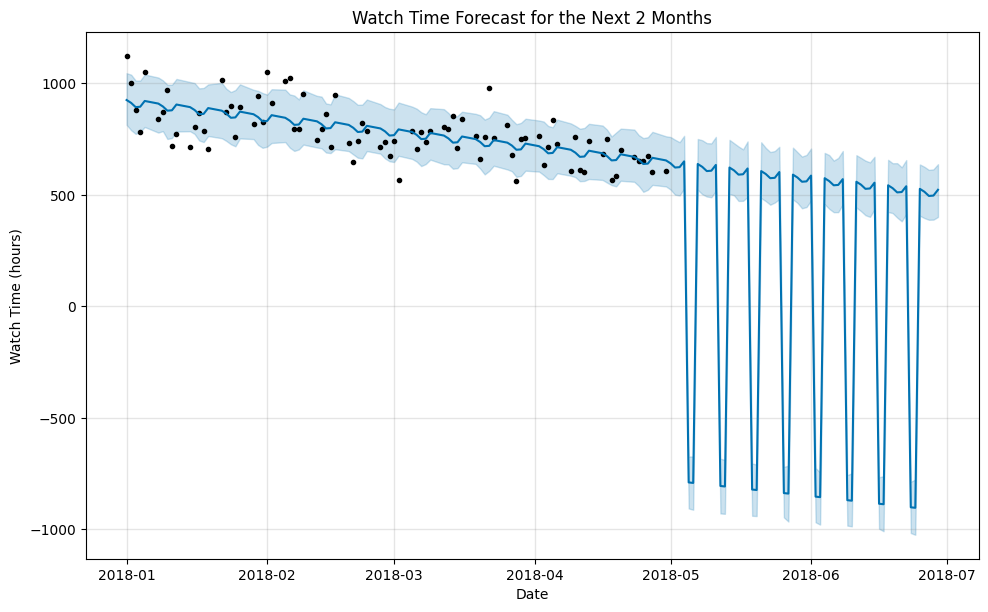

            ds        yhat
86  2018-05-01  641.705760
87  2018-05-02  622.752681
88  2018-05-03  624.402901
89  2018-05-04  650.397383
90  2018-05-05 -790.488720
91  2018-05-06 -792.766790
92  2018-05-07  638.672640
93  2018-05-08  625.758790
94  2018-05-09  606.805712
95  2018-05-10  608.455931
96  2018-05-11  634.450413
97  2018-05-12 -806.435690
98  2018-05-13 -808.713760
99  2018-05-14  622.725670
100 2018-05-15  609.811820
101 2018-05-16  590.858742
102 2018-05-17  592.508961
103 2018-05-18  618.503443
104 2018-05-19 -822.382660
105 2018-05-20 -824.660730
106 2018-05-21  606.778700
107 2018-05-22  593.864851
108 2018-05-23  574.911772
109 2018-05-24  576.561991
110 2018-05-25  602.556473
111 2018-05-26 -838.329630
112 2018-05-27 -840.607699
113 2018-05-28  590.831730
114 2018-05-29  577.917881
115 2018-05-30  558.964802
116 2018-05-31  560.615021
117 2018-06-01  586.609503
118 2018-06-02 -854.276600
119 2018-06-03 -856.554669
120 2018-06-04  574.884760
121 2018-06-05  561.970911
1

In [25]:
# Plot the forecast
model.plot(forecast)
plt.title("Watch Time Forecast for the Next 2 Months")
plt.xlabel("Date")
plt.ylabel("Watch Time (hours)")
plt.show()

# Print forecasted values for the next 60 days
print(forecast[['ds', 'yhat']].tail(60))